<center><h1><font face="vollkorn" color=navy> Title Here </font></h1><center>
<center><h2> Subtitle Here </h2></center>
<p>
<img src="http://www.berkeley.edu/brand/img/logos/primarylogo.png" style="float: center; width: 75%; margin-left: 20%;">
<p style="clear: both;">
<center><h1><font face="vollkorn" color=navy>Contributors:</center>
<p>
<h2>Name 1</h2>
<h2>Name 2</h2>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import RidgeCV
import numpy as np

ImportError: No module named seaborn

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_path = '/Users/choldgraf/gdrive/Projects/BIDS/Sourcing/data/modified_data/UCB_dept_merge.csv'

### Modified data
The first step was to select a subset of useful columns, and do some early data processing to have a reasonable data set.

In [4]:
# Parsing date columns allows us to do some nifty things with pandas
date_columns = ['po_closed_date', 'creation_date']

In [5]:
data = pd.read_csv(data_path, parse_dates=date_columns)

In [6]:
data.head(3)

po_id      po_num creation_date        supplier_name  \
0  29847876  BB00195887    2013-05-31  GIVE SOMETHING BACK   
1  29847864  BB00195886    2013-05-31         GRAINGER INC   
2  29847796  BB00195884    2013-05-31     BELLCO GLASS INC   

            item_type                                product_description  \
0   SQ Hosted Product  PORTABLE COMBINATION LAPTOP LOCK, 6 FT. CARBON...   
1    PunchOut Product  Wall Mount Fan, Oscillating, Number of Speeds ...   
2  NonCatalog Product  Septum Stopper, 20mm Blue Butyl Rubber QtyPerC...   

  manufacturer  quantity  unit_price  department buyer__first_name  \
0   KENSINGTON        30       24.32         NaN            Dustin   
1     AIR KING         1       35.58         NaN              Erin   
2          NaN         1       77.41         NaN           William   

  buyer__last_name po_closed_date         department_name   spend  
0           Miller     2013-07-16  UIAPA UB Academic Year  795.26  
1         Pinkston     2013-08-08  UKHDS Unit 1 Apt Admin   38.78  
2             Wolf            NaT      CCHEM RES Research  104.67

In [34]:
data.loc[np.random.choice(data.index, 10, replace=False), :]

po_id      po_num creation_date  \
510112  25290814  BB00096820    2012-11-05   
186974  34879129  BB00298432    2013-12-20   
188619  34818113  BB00296949    2013-12-18   
494807  25807210  BB00107968    2012-11-30   
397198  31196046  BB00224604    2013-07-26   
170355  35554545  BB00310777    2014-01-27   
326709  26551655  BB00123905    2013-01-11   
414227  30589715  BB00212048    2013-07-02   
345914  24078207  BB00070718    2012-09-12   
84810   32795550  BB00256297    2013-09-29   

                                   supplier_name           item_type  \
510112                              COMPVIEW INC  NonCatalog Product   
186974                East Meets West Foundation  NonCatalog Product   
188619                     VWR INTERNATIONAL INC   SQ Hosted Product   
494807                       GIVE SOMETHING BACK   SQ Hosted Product   
397198  Spectrum Chemicals&Laboratories Products   SQ Hosted Product   
170355                              Thorlabs Inc   SQ Hosted Product   
326709                                OFFICE MAX   SQ Hosted Product   
414227                      PRAXAIR DISTRIBUTION    PunchOut Product   
345914                         FISHER SCIENTIFIC   SQ Hosted Product   
84810                  EMD MILLIPORE CORPORATION   SQ Hosted Product   

                                      product_description  \
510112                              monger locking shroud   
186974  Contract Value Brief Project Desc. - VTP needs...   
188619  VWR TUBING 1/4X3/16 RD PK=10FT [PRIVATE LABEL ...   
494807  GREAT WHITE RECYCLED COPY PAPER  92 BRIGHTNESS...   
397198                      Unisex Specialty Lab Coat, SM   
170355            Mounting Post Base �2.48"  x 0.40" High   
326709  OfficeMax - Magnetic Aluminum-Framed Dry Erase...   
414227  NITROGEN LIQ 99.998% LC160(N2), NF - High Puri...   
345914  305145 Needles, Replacement; BD PrecisionGlide...   
84810         Goat Anti-Rabbit IgG, HRP-conjugate; 500 ?g   

                         manufacturer  quantity  unit_price  department  \
510112                            NaN         3      201.00         NaN   
186974                            NaN         1     1742.95         NaN   
188619            Private Label - VWR         1       53.20         NaN   
494807  HAMMERMILL/HP EVERYDAY PAPERS         2       36.02         NaN   
397198          Worklon/ Fashion Seal         1       32.29         NaN   
170355                       Thorlabs         1       23.70         NaN   
326709        OFFICEMAX PRIVATE LABEL         1       28.23         NaN   
414227                        PRAXAIR         1       64.66         NaN   
345914  Bd Vacutainer Labware Medical         1       84.00         NaN   
84810       EMD Millipore Corporation         1      159.00         NaN   

       buyer__first_name buyer__last_name po_closed_date  \
510112       Christopher           Brooks     2013-04-22   
186974            Serena          Quiroga     2014-03-27   
188619          Nicholas         Kellaris     2014-03-19   
494807         Christina            Huang     2013-05-10   
397198    Connor Gregory          Bischak     2013-11-08   
170355               Lei             Tian     2014-10-31   
326709               Tan           Truong     2013-04-22   
414227             David           Murphy     2013-09-13   
345914             Lilah         Rahn-lee     2013-02-04   
84810          Trevor L.            Starr     2014-07-16   

                    department_name    spend  
510112                  EERES CHESS  4068.08  
186974     CPSPH REV Wellness Guide  1125.77  
188619               PHYSI Research    92.22  
494807             DACED CR Gen Ops    78.34  
397198           CCHEM RES Research   228.85  
170355           IMMCB LSA Research  1234.93  
326709  BQRES RS Post Award Federal    75.15  
414227           IMMCB LSA Research    70.48  
345914          MEPMB MB RES GRANTS   506.20  
84810        OOEBI Depolymerization   160.49

In [69]:
from collections import Counter

In [74]:
words = [d.strip().split(' ') for d in data.product_description.dropna().values]

In [75]:
words = [i for word in words for i in word]

In [ ]:
def word_classifier(word):
    if word in ['a', 'b', 'c']:
        return 'office_supplies'
    elif word in 

In [76]:
cnt = Counter(words)

In [78]:
cnt

Counter({'-': 237732, '': 165841, 'x': 84821, 'for': 57336, 'Size': 54473, 'Color': 53929, 'and': 48491, 'of': 40331, 'to': 37468, 'Type': 32004, 'X': 27306, 'with': 26878, 'Quantity/Unit': 25548, 'Black,': 21228, 'in': 21215, '1': 20400, '1/EA': 20283, 'In.,': 19013, 'White,': 18906, 'HP': 18525, 'Length': 18042, '2': 17813, 'Service': 17051, 'OfficeMax': 16247, 'Order': 16084, 'Request': 15718, '20': 15082, '10': 13368, 'Material': 12963, 'VWR': 12942, '8-1/2"': 12651, '3': 12616, 'For': 12598, 'Paper': 12064, '5': 11948, 'In,': 11196, '100': 11092, 'per': 10615, 'Cartridge': 10550, 'BLACK': 10254, 'Head': 10174, '4': 10150, 'Toner': 10115, 'the': 9847, '11",': 9780, 'Description': 9675, 'Assorted,': 9614, '&': 9314, 'Point': 9009, 'lb': 8981, '12': 8928, '8': 8864, 'Black': 8800, 'in.': 8337, 'Blue,': 8330, 'Width': 8291, 'Number': 8157, 'High': 8029, 'a': 7943, '6': 7803, 'Steel': 7756, 'With': 7749, '1/2': 7619, 'Recycled': 7576, '*': 7507, '50': 7381, 'WHITE,': 7370, 'Ink': 7361,

In [43]:
data.groupby('product_description').count().sort('po_id', ascending=False)

po_id  \
product_description                                                                                                                                                            
Service Order Request                                                                                                                                                  15624   
Boise - Aspen 30 Recycled Multi-Use Paper - 92, White, 10/Carton, 8-1/2" x 11", 20 lb                                                                                   1496   
Coaches corporate credit cards                                                                                                                                          1224   
APP FOR MB AIR/13" MB PRO - EDU/AE                                                                                                                                      1032   
Price                                                                                                                                                                    703   
Boise - Aspen 30 Recycled Multi-Use Paper, Brightness 92, Color White, Quantity/Unit 10, Size 8-1/2" x 11", Weight 20 lb                                                 665   
APP FOR IMAC - EDU/AE--USA                                                                                                                                               630   
MBAIR 13.3 CTO                                                                                                                                                           508   
APP FOR MACBOOK PRO - EDU/AE--USA                                                                                                                                        477   
OptiPlex 9010 SFF;OptiPlex 9010 Small Form Factor w/ up to 90&#37; Efficient PSU                                                                                         436   
MINI DISPLAYPORT TO VGA ADAPTER-INT                                                                                                                                      435   
MINI DISPLAYPORT TO DVI ADAPTER-INT                                                                                                                                      416   
Boise - Aspen 100 Multi-Use Paper - 92, White, 500/Ream, 8-1/2" x 11", 20 lb                                                                                             414   
OptiPlex 9020 Small Form Factor;OptiPlex 9020 Small Form Factor                                                                                                          410   
APPLE USB SUPERDRIVE-ZML                                                                                                                                                 392   
Cost of Facility Rental                                                                                                                                                  391   
Boise - Aspen 30 Recycled Multi-Use Paper, Brightness 92, Color White, Quantity/Unit 10/Carton, Size 8-1/2" x 11", Weight 20 lbs                                         378   
OfficeMax - Manila File Folders - 1/3-Cut - Manila, 100/Pack, Letter, 1/3, Assorted                                                                                      367   
Bill rate and Qty of Hours                                                                                                                                               321   
APPLE MAGIC MOUSE-USA                                                                                                                                                    313   
MAGSAFE TO MAGSAFE 2 CONVERTER-ZML                                                                                                                                       297   
HELIUM 99.999% UHP T, Ultra High Purity Grade, HE 5.0UH-T, Helium, Ultra High Purity, HE                               

## Can also ask more interesting questions w/ time values
### Seasonal changes in purchasing

In [46]:
groupby = ['creation_date', 'department_name']
week_counts = data.groupby(groupby)\
    .count()['po_id'].unstack(groupby[-1]).resample('w', how='sum')
week_counts['week'] = week_counts.index.week

In [47]:
week_sums = week_counts.groupby('week').sum().replace(np.nan, 0)
week_mean = week_sums.mean(1)
week_ste = week_sums.std(1) / np.sqrt((week_sums != 0).sum(1))

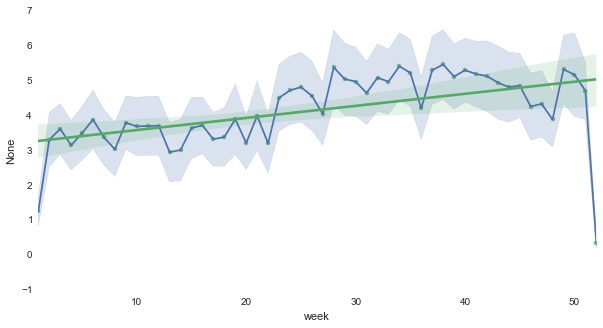

In [48]:
ax = week_mean.plot(figsize=(10, 5))
ax.fill_between(week_ste.index, week_mean-week_ste, week_mean+week_ste,
                alpha=.2)
sns.regplot(week_mean.index.values, week_mean, ax=ax)

In [49]:
# Similarities in time for depts
null_cut = 2
keep_cols = (week_sums == 0).sum(0) < null_cut
week_sums_active = week_sums.loc[:, keep_cols]
week_sums_normalized = week_sums_active / week_sums_active.max(0)

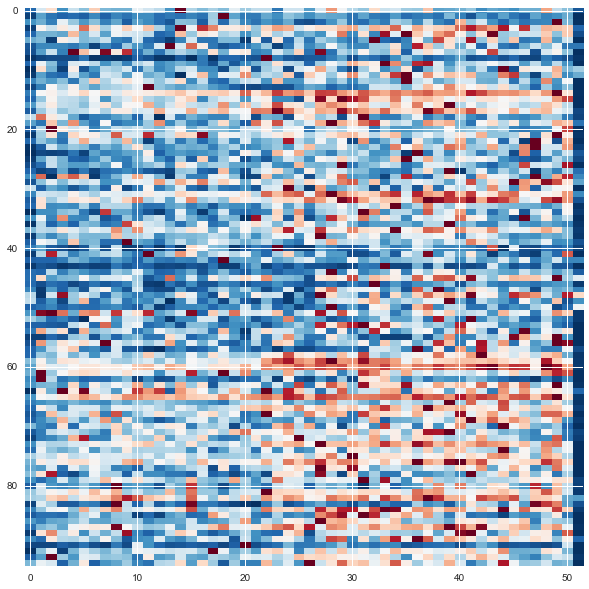

In [50]:
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(week_sums_normalized.T, cmap=plt.cm.RdBu_r,
          aspect='auto', interpolation='nearest')

In [51]:
from sklearn import cluster, metrics

In [52]:
# clust = cluster.KMeans()
# clust = cluster.AffinityPropagation()
# clust = cluster.SpectralClustering()
clust = cluster.AgglomerativeClustering(n_clusters=20)

In [53]:
X = week_sums_normalized.T.values
# X = week_sums_active.T.values
try:
    clust.fit(X)
    labels = clust.predict(X)
except:
    labels = clust.fit_predict(X)

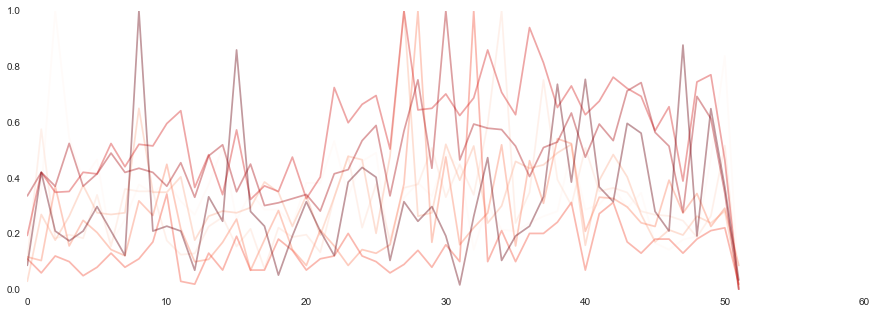

In [72]:
f, ax = plt.subplots(figsize=(15, 5))
col_plt = plt.cm.Reds(np.linspace(0, 1, clust.cluster_centers_.shape[0]))
ax.set_color_cycle(col_plt)
_ = ax.plot(clust.cluster_centers_.T, alpha=.4)

(array([  3.,  13.,   5.,  13.,   5.,   5.,   5.,   5.,  13.,   2.,   3.,
          4.,   4.,   5.,   1.,   2.,   2.,   2.,   2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

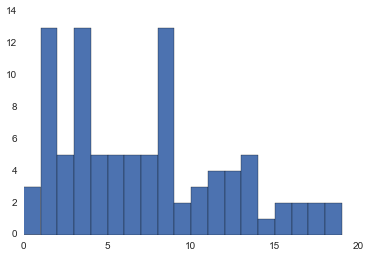

In [108]:
plt.hist(labels, bins=range(labels.max()+1))

In [54]:
sil = metrics.silhouette_score(X, labels)
print sil

0.0786382699357


/Users/choldgraf/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


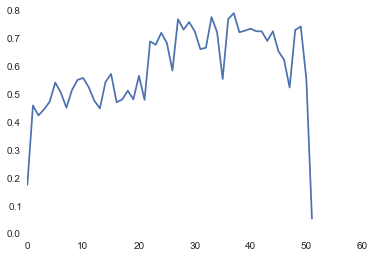

In [58]:
plt.plot(X[labels==8, :].mean(0))

## Correlation matrix

In [163]:
week_sums_corr = week_sums_normalized.corr()

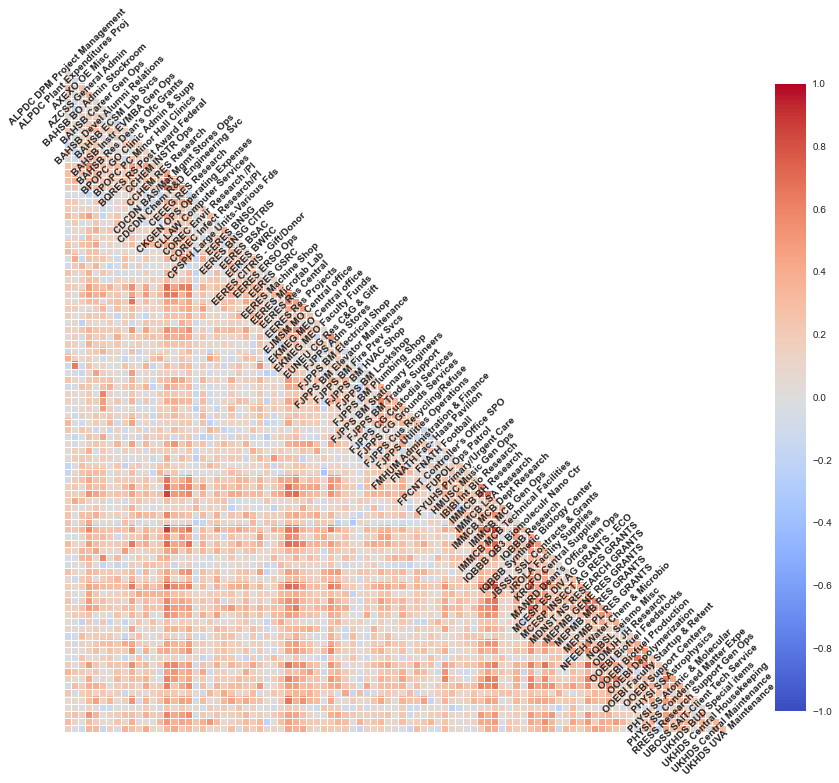

In [164]:
f, ax = plt.subplots(figsize=(15, 15))
sns.corrplot(week_sums_normalized, annot=False, ax=ax)

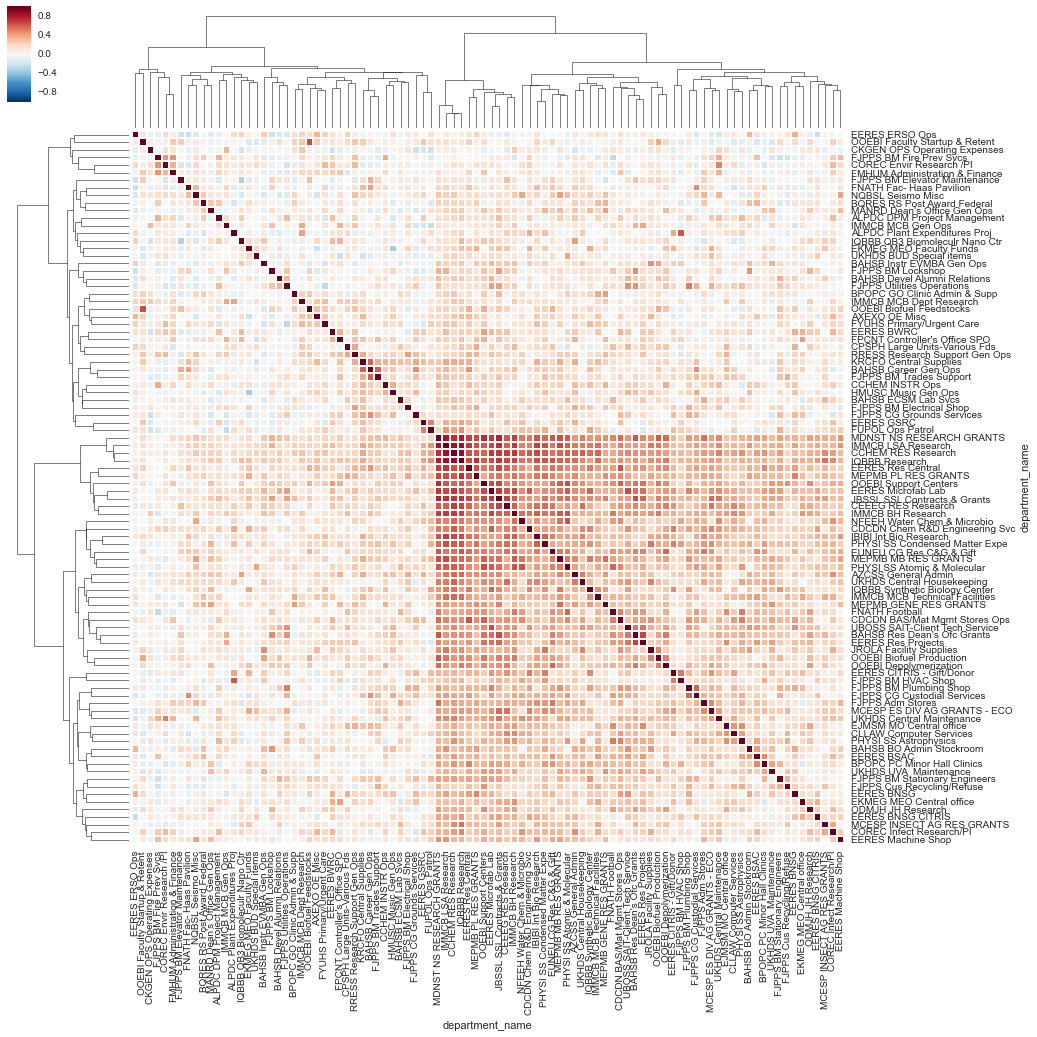

In [166]:
clust = sns.clustermap(week_sums_corr, figsize=(15, 15))

### Use correlation to compute clusters of "annual buyers"

## Time to complete
Finding questions to ask is more challenging than running the analyses themselves. For example, purchasing wants to reduce costs. What's a feature we can calculate that reflects "cost" for a PO?

In [24]:
# Datetime objects let us create "differences"
data['days_to_close'] = data['po_closed_date'] - data['creation_date']
data['days_to_close'] = data['days_to_close'].astype('timedelta64[D]')

In [28]:
use_depts = counts[counts > 2000].index.values

In [66]:
sort_grps = data.query('department_name in @use_depts').\
    groupby('department_name').median()['days_to_close'].copy()
sort_grps.sort(ascending=False)

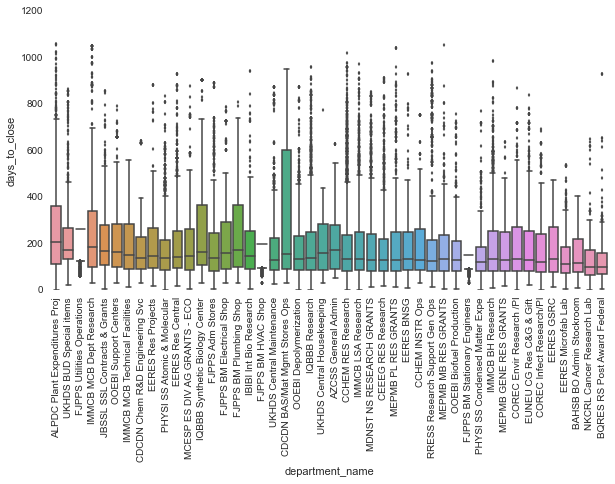

In [67]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data.query('department_name in @use_depts')['days_to_close'],
            groupby=data['department_name'], order=sort_grps.index, ax=ax)
_ = plt.xticks(rotation=90)

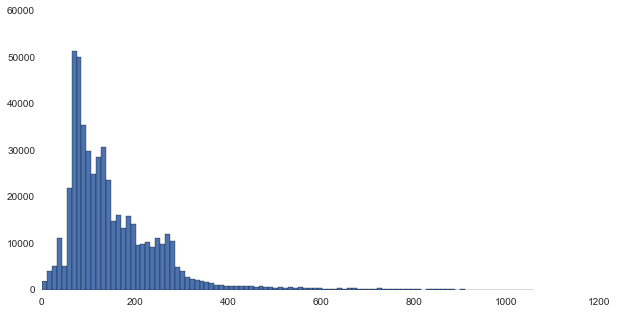

In [71]:
data.days_to_close.hist(bins=100, figsize=(10, 5))